-----
<center>
<h1 style="font-size: 50px; font-family: serif;">Fuel Consumption Ratings Regression !</h1>
</center>

---

<center>
<img src="https://media.tenor.com/GRq2qp1DU0wAAAAC/fuel-gas.gif" width="550" height='100'>
</center>


---
# Metadata:
---    
**1. Dataset**   : Given dataset contain 2022 Fuel Consumption Ratings information.

**2. Model Year**: Represent the year in which a particular model of a vehicle was produced. 

**3. Make**	  : It describe the brand or manufacturer of a vehicle.

**4. Model**     : It refers to a specific version of a vehicle produced by a manufacturer under a particular make or brand.

**5. Vehicle Class**: Represent the categorization system used in the automotive industry to group vehicles based on their                        size, body style, and intended use. 

**6. Engine Size**  : It tell us about the total volume of air and fuel that can be drawn into the engine cylinders of a                          vehicle's engine during one complete cycle. It is typically measured in either cubic centimeters (cc)                      or liters (L).

**7. Cylinders**    : It refer to the individual chambers within a vehicle's engine where the combustion process takes place.

**8. Transmission** : It represent the system in which power transmission take place, from the engine to the wheels, which                        allowing the vehicle to move forward or backward

**9. Fuel Type**    : It refers to the specific type of fuel that is used to power a vehicle, machine, or other device.

**10. Fuel Consumption(City (L/100 km)** : it represent fuel consumption in the city.

**11. Fuel Consumption(Hwy (L/100 km)** : it represent fuel consumption on the Highway.

**12. Fuel Consumption(Comb (L/100 km)** : it represent fuel consumption for both city and highway.

**13. Fuel Consumption(Comb (mpg))**: it represent fuel consumption for both city & highway, in miles per imperial gallon(mpg).

**14. CO2 Emissions(g/km)** : It refer to the amount of CO2 that is emitted by a vehicle for every kilometer that it is driven.

**15. CO2 Rating**  : It's measure a vehicle's carbon dioxide (CO2) emissions, typically expressed in grams of CO2 per                           kilometer(g/km).

**16. Smog Rating** : It's measure a vehicle's emissions of pollutants that contribute to the formation of smog. 

-----
<center>
<h1 style="font-size: 30px; font-family: serif;">Report content</h1>
</center>

---
1. <a href="#Importmodules">Import Modules</a><br>
    1.1 <a href="#Importdata">Importing data into Dataframe</a><br>
    
2. <a href="#Datatcleaning">Data cleaning</a><br>
    2.1 <a href="#df1">Creating new DataFrame with necessary columns</a><br>
    2.2 <a href="#nullcheck">Checking null values</a><br>
    2.3 <a href="#treatfuel">Treating Null's in "Fuel type"</a><br>
    2.4 <a href="#nullco2">Dealing with the nulls present in feature "CO2 Rating"</a><br>
    
<a href="#eda"># Exploratory Data Analysis (E.D.A.)</a><br>

3. <a href="#univar">Univariate analysis:-</a><br>
    3.1  <a href="#mean">Checking Mean, Median, Standard Deviation and Quantile</a><br>
    3.2 <a href="#distribute">Frequency Distribution for the categorical Columns</a><br>
    3.3 <a href="#numerical">Frequency Distribution on Numerical columns</a><br>
    
4. <a href="#bivariate">Bivariate analysis:-</a><br>
    4.1 <a href="#compare">Comparison Between all columns</a><br>
    4.2  <a href="#comparecylinder">Comparison between "No. of cylinders" & "Fuel consumption"</a><br>
    4.3 <a href="#chi">Performing Chi Square analysis</a><br>
    4.4 <a href="#heatcorr">Heatmap showing "Pearson correlation"</a><br>
    

5. <a href="#prepro">Data Preprocessing</a><br>
    5.1 <a href="#outlier">Outlier analysis</a><br>
    5.2 <a href="#x&y">Creating X And Y for models</a><br>
    5.3 <a href="#ordinal">Ordinal encoding</a><br>
    5.4 <a href="#onehot">One Hot encoding on categorical columns</a><br>
    5.5 <a href="#traintest">Split into train and test set</a><br>
    5.6 <a href="#scailing">Feature Scaling</a><br>
    

6. <a href="#model">Training Models</a><br>
    6.1 <a href="#linear">Linear Regression</a><br>
    6.2  <a href="#decision">Decision Tree Regressor</a><br>
    6.3 <a href="#rf">Random Forest Regressor</a><br>
    6.4 <a href="#svr">SVR Model</a><br>
    6.4 <a href="#polynomial">Polynomial Regression</a><br>
    
    
7. <a href="#deployment">Model Deployment</a><br>
    7.1 <a href="#pickling">Pickling Model and Scaler object for Deployment</a><br>
     
    
    
    
    
        
        





---
# 1. Import Modules 
<span id="Importmodules"></span>

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import plotly.express as px
# import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
# -----------warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# 1.1 Creating Dataframe
<span id="Importdata"></span>

In [5]:
df = pd.read_csv(r"D:\MASAI\ML\FUEL_CONSUMPTION_PROJECT\MY2022 Fuel Consumption Ratings.csv")
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,NaN
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


-----
<center>
<h1 style="font-size: 40px; font-family: serif;">2. Data cleaning</h1>
</center>
<span id="Datatcleaning"></span>

---

# 2.1 Creating new DataFrame with necessary columns
<span id="df1"></span>


In [8]:
df1= df.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

**New DataFrame**

In [9]:
df1

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0
941,SUV: Small,2.0,4,AS8,Z,9.4,5.0
942,SUV: Small,2.0,4,AS8,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS8,Z,10.1,5.0


**Renaming the columns**

In [10]:
df1 = df1.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Cylinders': 'Cylinders', 'Transmission':'Transmission','Fuel Type':'Fuel Type', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption', 'CO2 Rating':'CO2 Rating'})

## 2.2 Checking null values
<span id="nullcheck"></span>

In [14]:
df1.isna().sum()

Vehicle Class        0
Engine Size          0
Cylinders            0
Transmission         0
Fuel Type            1
Fuel Consumption     0
CO2 Rating          13
dtype: int64

## 2.3 Treating Null's in "Fuel type"
<span id="treatfuel"></span>

In [15]:
df1['Fuel Type'].fillna((df1['Fuel Type'].mode()[0]), inplace=True)

In [16]:
df1.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0


## 2.4 Dealing with the nulls present in feature "CO2 Rating"
<span id="nullco2"></span>

In [17]:
df1['CO2 Rating'].fillna(0,inplace=True)
a = []

for i,v in zip(df1['Fuel Consumption'], df1['CO2 Rating']):
    if v==0:
        if 18.5 <= i <= 26.5:
            a.append(1)
        elif 15.5 <= i < 18.5:
            a.append(2) 
        elif 12.5 <= i < 15.5: 
            a.append(3)
        elif 11 <= i < 12.5: 
            a.append(4)
        elif 9 <= i < 11: 
            a.append(5)
        elif 7.7 <= i < 9: 
            a.append(6)
        elif 6.7 <= i < 7.7: 
            a.append(7)
        elif 5.5 <= i < 6.7: 
            a.append(8)
        elif 4.5 <= i < 5.5: 
            a.append(9)
        elif i < 4.5: 
            a.append(10)            
    else:
        a.append(v)
        
        
df1['CO2 Rating'] = a


In [ ]:
df1.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

## Checking the correlation

In [ ]:
df1.corr()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
Engine Size,1.000000,0.920672,0.818655,-0.766437
Cylinders,0.920672,1.000000,0.821719,-0.762320
Fuel Consumption,0.818655,0.821719,1.000000,-0.927745
CO2 Rating,-0.766437,-0.762320,-0.927745,1.000000


**Checking Corelation of each feature against target variable**

In [ ]:
df1.corr()["Fuel Consumption"]

Engine Size         0.818655
Cylinders           0.821719
Fuel Consumption    1.000000
CO2 Rating         -0.927745
Name: Fuel Consumption, dtype: float64

## Looking for noise in all the features, including Target variable.

In [18]:
for i in df1.columns:
    print(i)
    print(df1[i].unique(),'\n')
    
    

Vehicle Class
['Compact' 'SUV: Small' 'Mid-size' 'Minicompact' 'SUV: Standard'
 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Special purpose vehicle'] 

Engine Size
[2.4 3.5 2.  3.  2.9 4.  5.2 2.5 6.  4.4 6.6 8.  3.6 1.4 1.2 1.3 2.7 6.2
 2.8 1.5 5.3 5.7 6.4 2.3 3.3 5.  1.8 1.6 3.8 5.6 3.2 6.5 4.6 3.4 3.7 6.7] 

Cylinders
[ 4  6  8 12 10  5 16  3] 

Transmission
['AM8' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10' 'A6' 'M5'
 'M7' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5' 'A7'] 

Fuel Type
['Z' 'X' 'D' 'E'] 

Fuel Consumption
[ 8.6 11.2  9.9 10.3  9.8 11.   8.7  9.2 11.6  9.3  9.6 12.3 11.5 13.8
 14.6  7.6  8.2  8.8  8.9  9.1 10.  10.6  9.4 10.8 11.7 15.3 11.4 13.7
 13.5 15.4  9.7 10.9 13.9 10.1  9.  13.2 16.3 12.2 16.2 12.5 17.  16.
  8.3 12.  12.6 12.7 12.9 15.1 10.4 15.7 11.1  8.5 22.2 26.1 11.8  7.8
  7.9  9.5 10.2 13.  10.7 14.8 15.2 10.5 14.7 14.9 11.3 12.1 14.1 

## Removed the Numbers from Transmission columns

In [19]:
df1 = df1.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M', 'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df1

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM,Z,8.6,6.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0
4,Compact,2.0,4,AS,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS,Z,9.4,5.0
941,SUV: Small,2.0,4,AS,Z,9.4,5.0
942,SUV: Small,2.0,4,AS,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS,Z,10.1,5.0


In [20]:
df1['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">Exploratory Data Analysis (E.D.A.)</h1>
</center>
<span id="eda"></span>

---


# 3. Univariate analysis:-
<span id="univar"></span>

---

## 3.1 Checking Mean, Median, Standard Deviation and Quantile :
<span id="mean"></span>


In [21]:
df1[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].agg(['mean','median','std','quantile'])

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
mean,3.199683,5.669841,11.093439,4.537566
median,3.000000,6.000000,10.800000,5.000000
std,1.375231,1.932930,2.877491,1.471090
quantile,3.000000,6.000000,10.800000,5.000000


## 3.2 Frequency Distribution for the categorical Columns
<span id="distribute"></span>


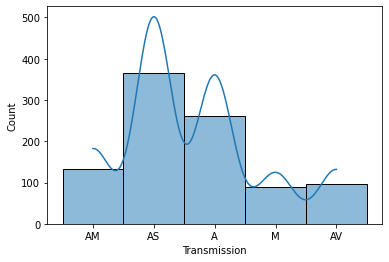

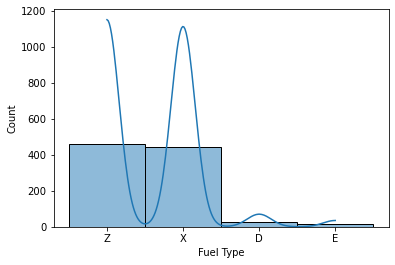

In [22]:
column_sets = ['Transmission', 'Fuel Type']

for i, k in enumerate(column_sets):
    sns.histplot(x=df1[k],kde = True)
    plt.show()

## 3.3 Frequency Distribution on Numerical columns
<span id="numerical"></span>


**Between cylinders & Engine size**

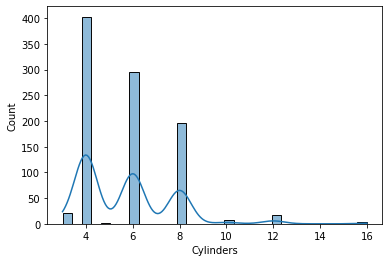

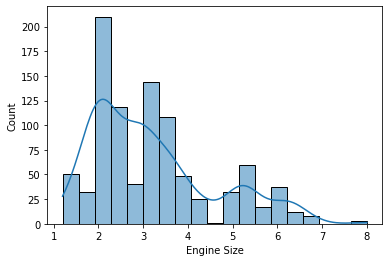

In [ ]:
column_sets = ['Cylinders','Engine Size']

for i, k in enumerate(column_sets):
    sns.histplot(x=df1[k],kde = True)
    sns.color_palette("Paired")
    plt.show()
    

**Between Co2 Ratings & Fuel consumption**

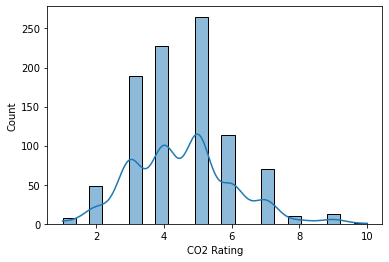

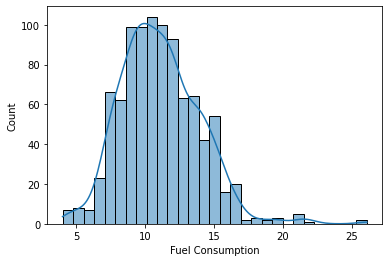

In [ ]:
column_sets = ['CO2 Rating','Fuel Consumption']

for i, k in enumerate(column_sets):
    sns.histplot(x=df1[k],kde = True)
    sns.color_palette("Paired")
    plt.show()
    

---
# 4 Bivariate analysis
<span id="bivariate"></span>

---

## 4.1 Comparison Between all columns
<span id="compare"></span>


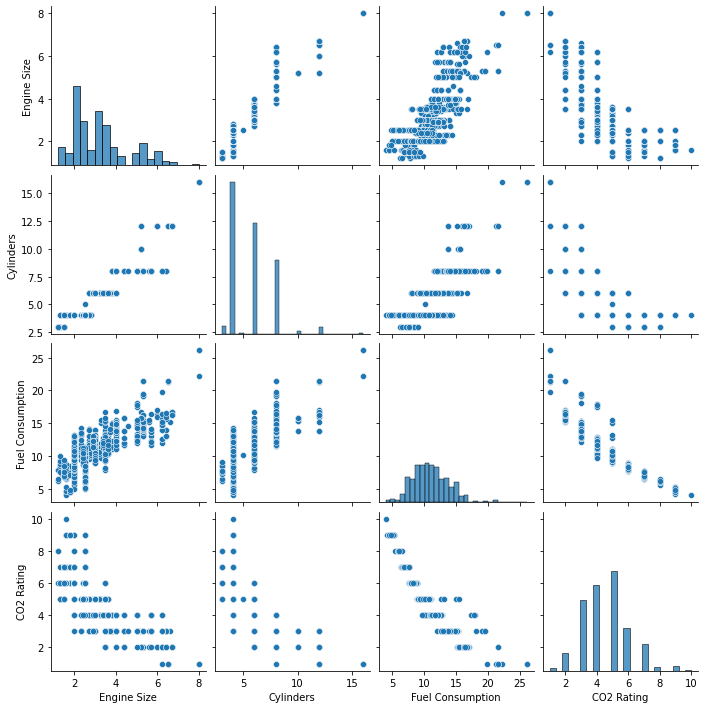

In [ ]:
sns.pairplot(df1)

## 4.2 Comparison between "No. of cylinders" & "Fuel consumption"
<span id="comparecylinder"></span>


Text(0, 0.5, 'Fuel Consumption')

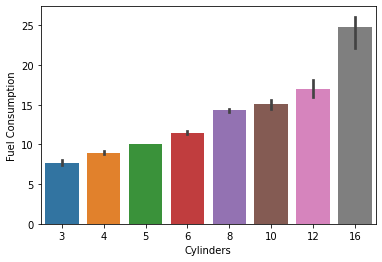

In [ ]:
sns.barplot(x="Cylinders", y="Fuel Consumption", data=df1)
plt.ylabel('Fuel Consumption')

## 4.3 Performing Chi Square analysis:-
<span id="chi"></span>


In [ ]:
from scipy.stats import chi2_contingency

### Chi Analysis for Transmission and Fuel Type:

In [ ]:
ftt= pd.crosstab(df1['Transmission'],df1['Fuel Type'])

In [ ]:
ftt

Fuel Type,D,E,X,Z
Transmission,,,,
A,28,6,141,87
AM,0,0,25,107
AS,0,8,150,207
AV,0,0,87,9
M,0,0,41,49


In [ ]:
Chi_square_statistic,p,dof,expec = chi2_contingency(ftt)

In [ ]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.762904200058271e-41
Dependent
dof is 12


### Chi Analysis for Transmission and Vehicle Class:

In [ ]:
vct=pd.crosstab(df1['Transmission'],df1['Vehicle Class'])

In [ ]:
vct

Vehicle Class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
Transmission,,,,,,,,,,,,,,
A,3,16,18,3,3,15,74,47,67,4,1,0,10,1
AM,8,18,12,25,0,1,0,16,0,0,2,8,16,26
AS,34,19,46,4,2,1,38,91,69,8,4,2,34,13
AV,11,9,22,0,2,1,0,36,5,0,1,7,2,0
M,13,2,19,16,0,2,1,7,0,0,0,2,17,11


In [ ]:
Chi_square_statistic,p,dof,expec = chi2_contingency(vct)

In [ ]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.356375805194314e-79
Dependent
dof is 52


## 4.4 Heatmap showing "Pearson correlation" :
<span id="heatcorr"></span>


<AxesSubplot:>

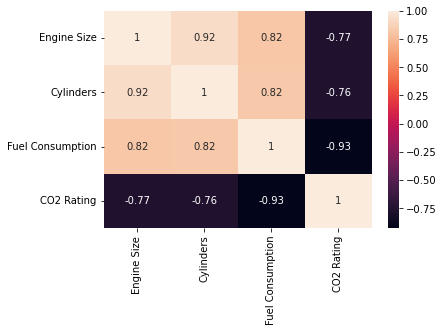

In [ ]:
sns.heatmap(df1.corr(),annot=True)

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">5. Data Preprocessing</h1>
</center>
<span id="prepro"></span>

---


# 5.1 Outlier analysis
<span id="outlier"></span>


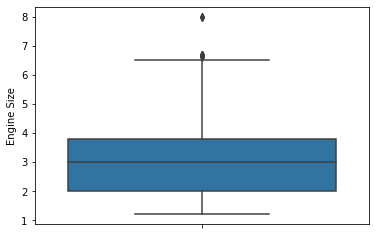

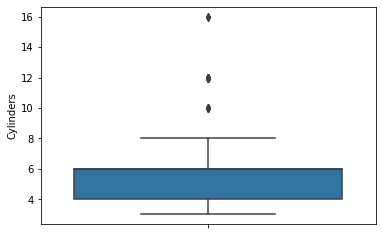

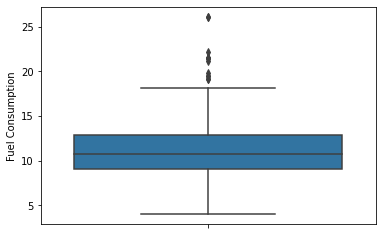

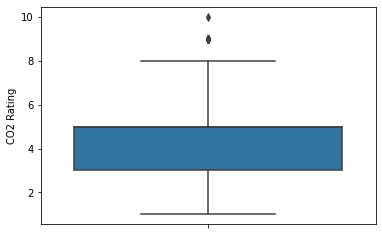

In [ ]:
for c in df1.columns:
    if df1[c].dtypes!= object:
        sns.boxplot(y=c,data=df1)
        plt.show()

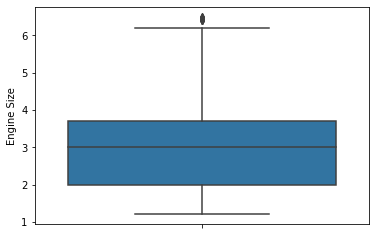

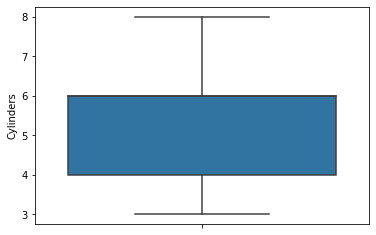

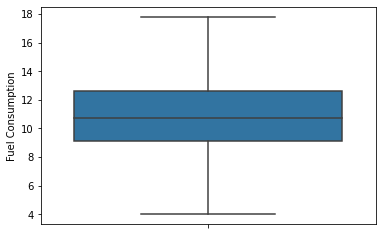

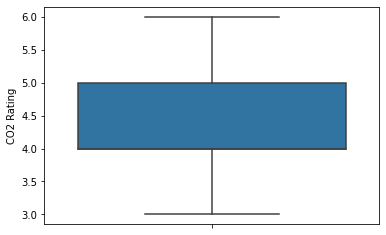

In [ ]:
for c in df1.columns:
    if df1[c].dtypes!= object:
        percentile25=df1[c].quantile(0.25)
        percentile75=df1[c].quantile(0.75)
        iqr=percentile75-percentile25
        upp_limit=percentile75+(1.5*iqr)
        lower_limit=percentile25-(1.5*iqr)
        df1=df1[df1[c]<=upp_limit]
        df1=df1[df1[c]>=lower_limit]
        plt.figure()
        sns.boxplot(y=c,data=df1)


In [ ]:
df1.shape

(783, 7)

## 5.2 Creating X And Y for models
<span id="x&y"></span>


In [ ]:
x= df1.drop('Fuel Consumption',axis=1)
x

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,CO2 Rating
0,Compact,2.4,4,AM,Z,6.0
1,SUV: Small,3.5,6,AS,Z,4.0
2,SUV: Small,2.0,4,AS,Z,5.0
3,SUV: Small,2.0,4,AS,Z,5.0
4,Compact,2.0,4,AS,Z,5.0
...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS,Z,5.0
941,SUV: Small,2.0,4,AS,Z,5.0
942,SUV: Small,2.0,4,AS,Z,5.0
943,SUV: Standard,2.0,4,AS,Z,5.0


In [ ]:
y= df1['Fuel Consumption']
y

0       8.6
1      11.2
2       9.9
3      10.3
4       9.8
       ... 
940     9.4
941     9.4
942     9.9
943    10.1
944    10.8
Name: Fuel Consumption, Length: 783, dtype: float64

## 5.3 Ordinal encoding
<span id="ordinal"></span>


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
order = ['AV', 'AM', 'M', 'AS', 'A']

od = OrdinalEncoder(categories = [order])

x["Transmission"] = od.fit_transform(x[["Transmission"]])

In [ ]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan', 'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle', 'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

x["Vehicle Class"] = od.fit_transform(x[["Vehicle Class"]])

## 5.4 One Hot encoding on categorical columns
<span id="onehot"></span>


In [ ]:
oh = OneHotEncoder(sparse = False)
newx = pd.DataFrame(oh.fit_transform(x[['Fuel Type']]))
newx.columns = oh.get_feature_names()
newx

,x0_D,x0_E,x0_X,x0_Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
778,0.0,0.0,0.0,1.0
779,0.0,0.0,0.0,1.0
780,0.0,0.0,0.0,1.0
781,0.0,0.0,0.0,1.0


In [ ]:
x = x.reset_index()

In [ ]:
for c in newx.columns:
    x[c] = newx[c]
x.head()

,index,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,CO2 Rating,x0_D,x0_E,x0_X,x0_Z
0,0,2.0,2.4,4,1.0,Z,6.0,0.0,0.0,0.0,1.0
1,1,6.0,3.5,6,3.0,Z,4.0,0.0,0.0,0.0,1.0
2,2,6.0,2.0,4,3.0,Z,5.0,0.0,0.0,0.0,1.0
3,3,6.0,2.0,4,3.0,Z,5.0,0.0,0.0,0.0,1.0
4,4,2.0,2.0,4,3.0,Z,5.0,0.0,0.0,0.0,1.0


In [ ]:
colrn = {"x0_D":"fuel type D", "x0_E":"fuel type E", "x0_X":"fuel type X", "x0_Z":"fuel type Z"}

In [ ]:
x.rename(colrn, axis = 1, inplace = True)

## 5.5 Split into train and test set
<span id="traintest"></span>


In [ ]:
x = x.drop(["Fuel Type", "index"], axis = 1)
y= df1['Fuel Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 0)

In [ ]:
xtrain

,Vehicle Class,Engine Size,Cylinders,Transmission,CO2 Rating,fuel type D,fuel type E,fuel type X,fuel type Z
605,6.0,2.0,4,0.0,5.0,0.0,0.0,1.0,0.0
62,3.0,2.0,4,3.0,6.0,0.0,0.0,0.0,1.0
78,3.0,3.0,6,3.0,4.0,0.0,0.0,0.0,1.0
354,13.0,6.2,8,4.0,3.0,0.0,0.0,0.0,1.0
443,6.0,3.6,6,2.0,4.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
763,4.0,2.0,4,1.0,5.0,0.0,0.0,0.0,1.0
192,13.0,6.2,8,4.0,3.0,0.0,0.0,0.0,1.0
629,0.0,4.0,6,2.0,4.0,0.0,0.0,0.0,1.0
559,9.0,2.0,4,1.0,5.0,0.0,0.0,0.0,1.0


## 5.6 Feature Scaling
<span id="scailing"></span>


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
xtrain = sc.fit_transform(xtrain)

In [ ]:
xtrain

array([[ 0.00287496, -0.98627012, -1.02846876, ..., -0.08283154,
         1.12534851, -1.02588866],
       [-0.84092626, -0.98627012, -1.02846876, ..., -0.08283154,
        -0.88861361,  0.97476464],
       [-0.84092626, -0.1368855 ,  0.2853749 , ..., -0.08283154,
        -0.88861361,  0.97476464],
       ...,
       [-1.68472747,  0.71249913,  0.2853749 , ..., -0.08283154,
        -0.88861361,  0.97476464],
       [ 0.84667618, -0.98627012, -1.02846876, ..., -0.08283154,
        -0.88861361,  0.97476464],
       [ 0.00287496, -0.98627012, -1.02846876, ..., -0.08283154,
        -0.88861361,  0.97476464]])

In [ ]:
xtest = sc.transform(xtest)

In [ ]:
xtest

array([[ 0.00287496,  0.28780682,  0.2853749 , ..., -0.08283154,
         1.12534851, -1.02588866],
       [-1.12219333, -0.98627012, -1.02846876, ..., -0.08283154,
        -0.88861361,  0.97476464],
       [ 1.97174447,  1.81669915,  1.59921856, ..., -0.08283154,
         1.12534851, -1.02588866],
       ...,
       [-1.12219333, -0.98627012, -1.02846876, ..., -0.08283154,
         1.12534851, -1.02588866],
       [ 0.28414203,  1.81669915,  1.59921856, ..., -0.08283154,
         1.12534851, -1.02588866],
       [-0.55965918, -0.22182396,  0.2853749 , ..., -0.08283154,
        -0.88861361,  0.97476464]])

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">6. Training Models</h1>
</center>
<span id="model"></span>

---

# 6.1 Linear Regression
<span id="linear"></span>


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
lr.intercept_

11.131844977780553

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.9255653839706419
testing score =  0.9270141441790111


In [ ]:
ypred = lr.predict(xtest)

In [ ]:
r2_score(ytest, ypred)

0.9270141441790111

# 6.2 Decision Tree Regressor
<span id="decision"></span>


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(max_depth=3)

In [ ]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3)

In [ ]:
ypred=dc.predict(xtest)

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9067389747673642
testing score =  0.8865253050515427


In [ ]:
r2_score(ytest, ypred)

0.8865253050515427

**Visualising the tree**

In [ ]:
from sklearn import tree

In [ ]:
new = df1[["Vehicle Class","Engine Size","Cylinders","Transmission","Fuel Type","CO2 Rating"]]

Index(['Vehicle Class', 'Engine Size', 'Cylinders', 'Transmission',
       'Fuel Type', 'CO2 Rating'],
      dtype='object')

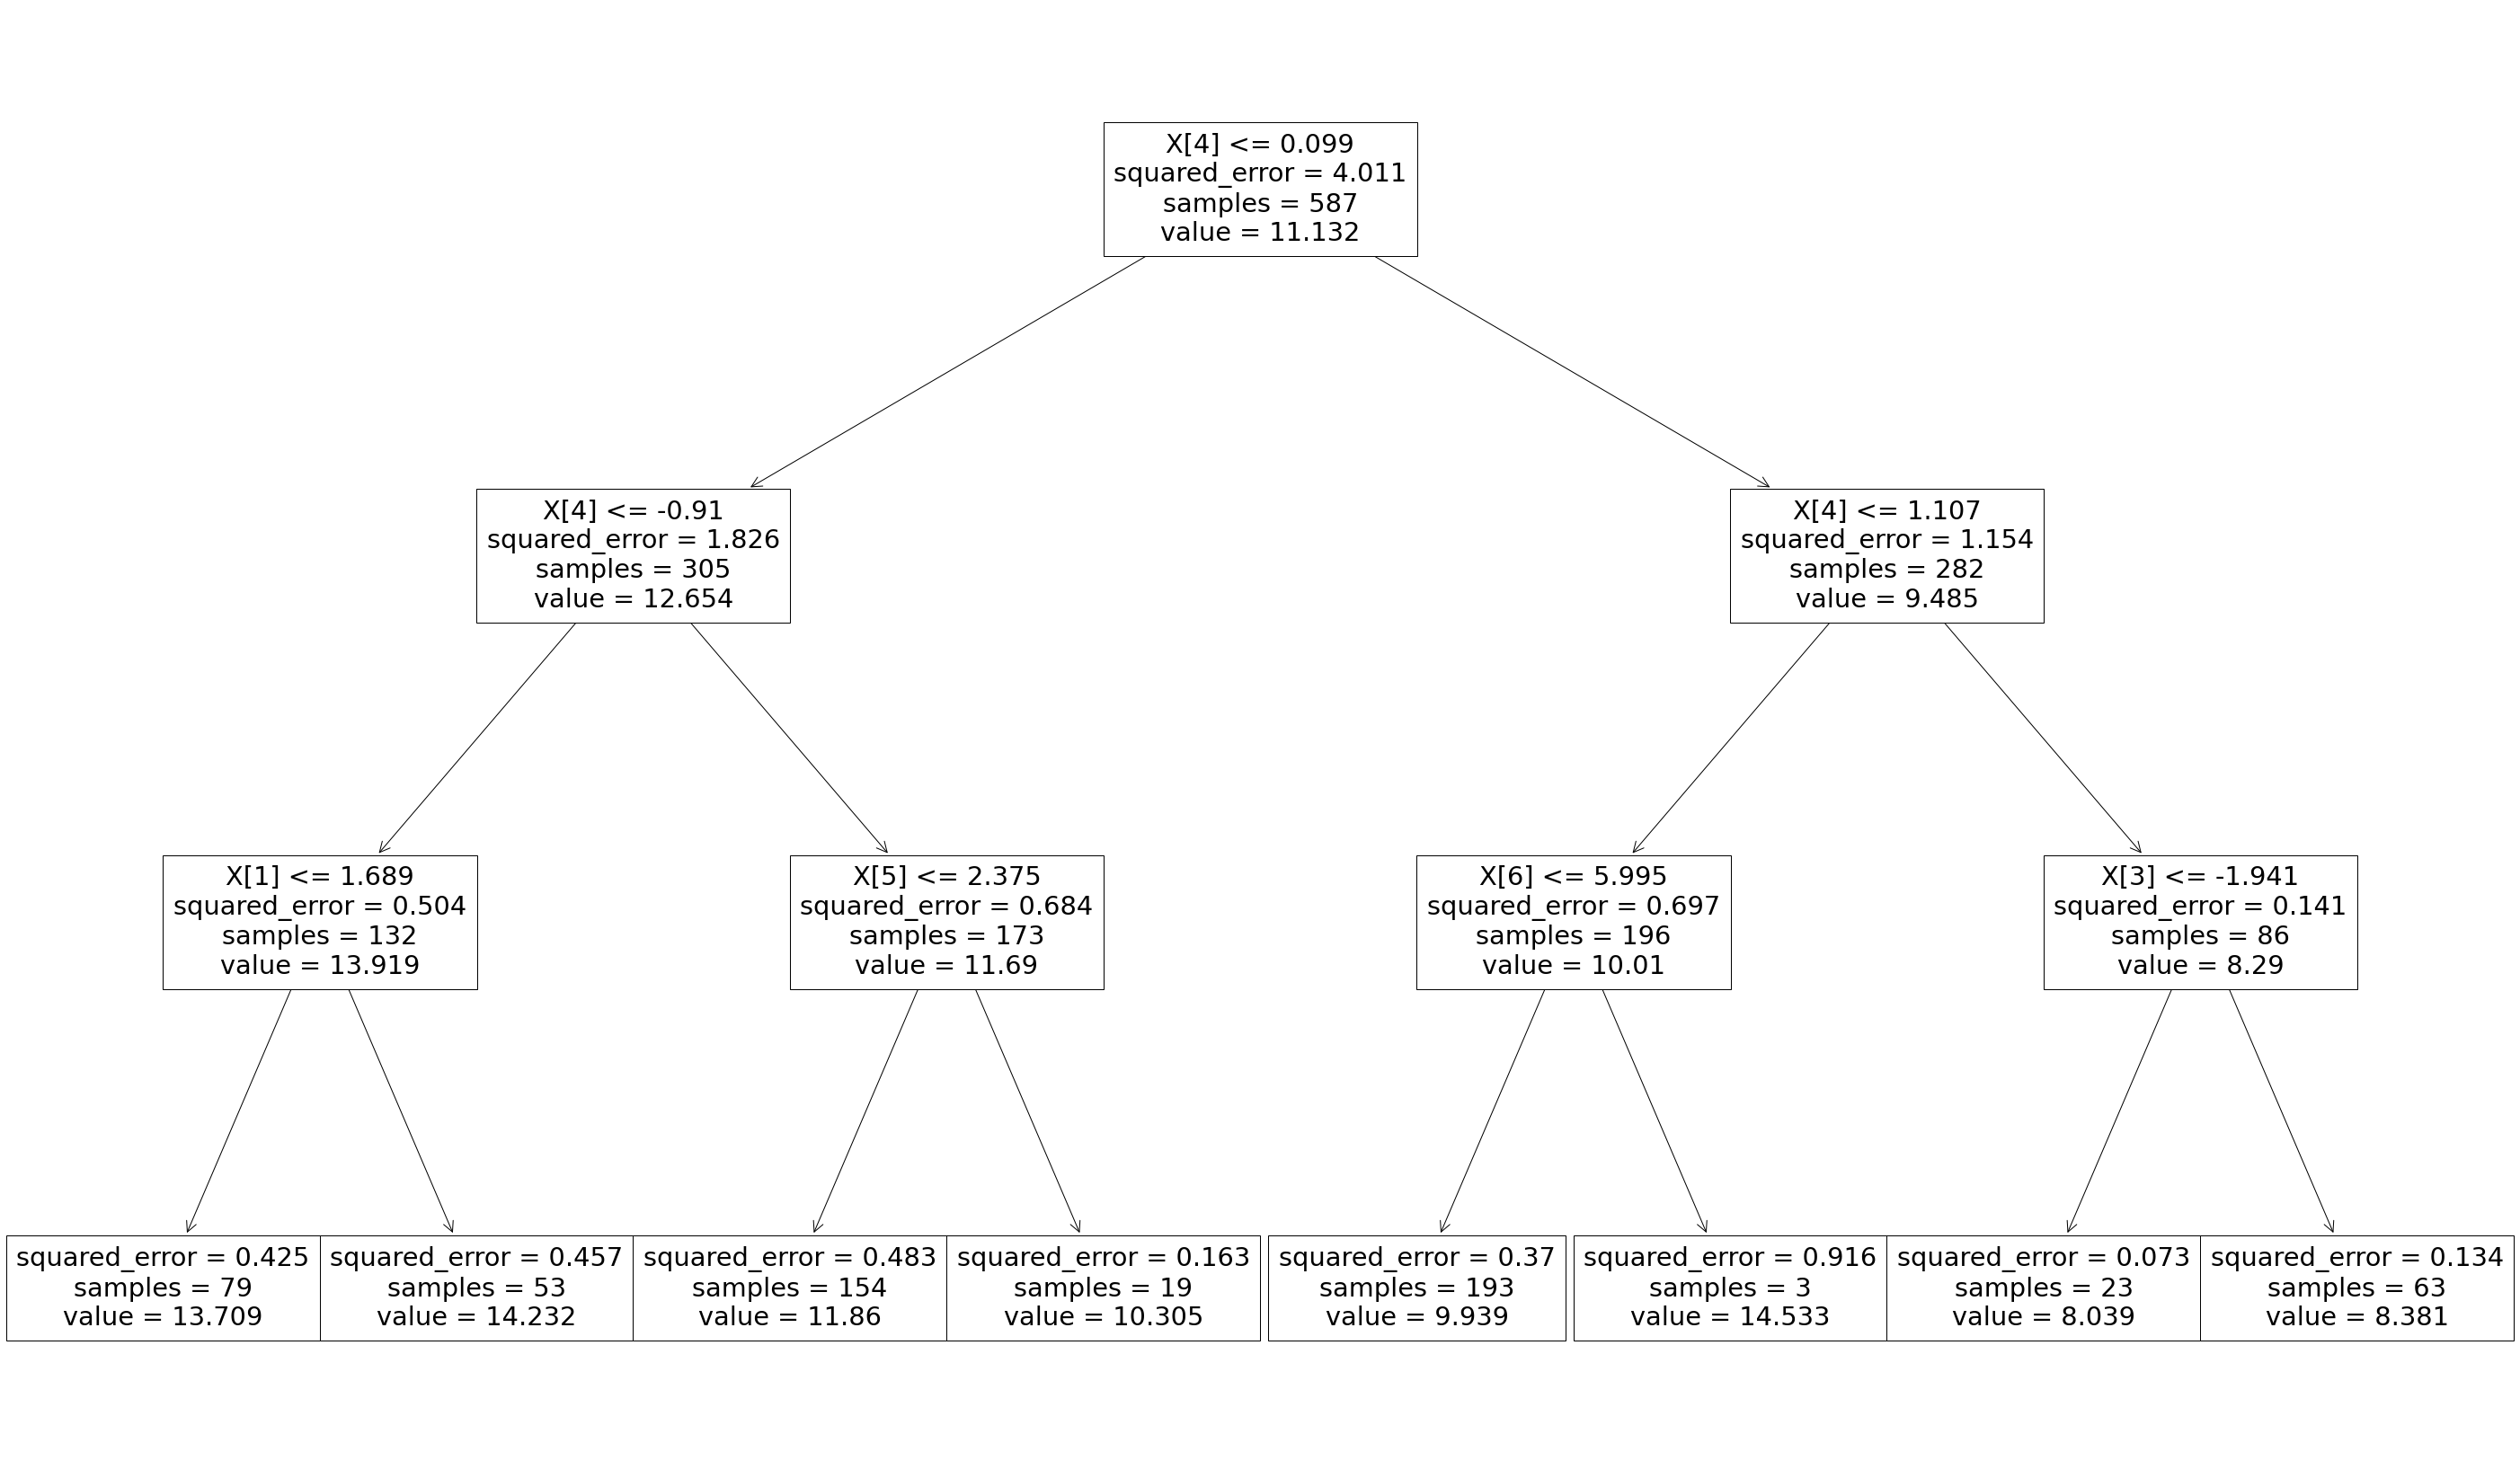

In [ ]:
plt.figure(figsize=(50,30))
tree.plot_tree(dc)
plt.show()

# 6.3 Random Forest Regressor
<span id="rf"></span>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [ ]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
rscv.best_params_

{'n_estimators': 90,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'squared_error'}

In [ ]:
rf = RandomForestRegressor(n_estimators = 100 , min_samples_split = 2, max_features =  'log2', max_depth = 14, criterion='poisson')

In [ ]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9568588986099025
testing score =  0.9446483050100336


In [ ]:
r2_score(ytest,ypred)

0.9446483050100336

# 6.5 SVR Model
<span id="svr"></span>

In [ ]:
from sklearn.svm import SVR
svr = SVR()

### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
para = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
rsv = RandomizedSearchCV(svr,para,scoring = "neg_mean_squared_error",n_iter = 5, cv = 5,n_jobs = -1)
rsv.fit(xtrain,ytrain)    

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [1, 5, 10],
                                        'coef0': [0.01, 10, 0.5],
                                        'degree': [3, 8],
                                        'gamma': ('auto', 'scale'),
                                        'kernel': ('linear', 'poly', 'rbf',
                                                   'sigmoid')},
                   scoring='neg_mean_squared_error')

In [ ]:
rsv.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'degree': 8, 'coef0': 10, 'C': 10}

In [ ]:
svr= SVR(kernel = 'rbf', gamma = 'scale', degree = 8, coef0 = 0.5, C = 10)

In [ ]:
svr.fit(xtrain,ytrain)
ypred= svr.predict(xtest)

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9568588986099025
testing score =  0.9446483050100336


In [ ]:
r2_score(ytest,ypred)

0.9234605430940793

In [ ]:
svr.score(xtrain,ytrain)

0.9467621034670809

# 6.6 Polynomial Regression
<span id="polynomial"></span>

### Degree = 2

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(xtrain)

In [ ]:
lr_poly_regressor = LinearRegression(fit_intercept = True)
lr_poly_regressor.fit(X_poly,ytrain)

LinearRegression()

In [ ]:
ypred =lr_poly_regressor.predict(poly_reg.fit_transform(xtest))

In [ ]:
r2_score(ytest, ypred)

0.9329591860746017

### Degree = 3

In [ ]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(xtrain)

In [ ]:
lr_poly_regressor = LinearRegression(fit_intercept = True)
lr_poly_regressor.fit(X_poly,ytrain)

LinearRegression()

In [ ]:
ypred =lr_poly_regressor.predict(poly_reg.fit_transform(xtest))

In [ ]:
r2_score(ytest, ypred)

0.9187576813582896

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">7. Model Deployment</h1>
</center>
<span id="deployment"></span>

---

# 7.1 Pickling Model and Scaler object for Deployment
<span id="pickling"></span>


In [ ]:
import pickle as pk

In [ ]:
filename = "scaled_data.sav"
pk.dump(sc, open(filename, "wb")) #write binary = wb

In [ ]:
loaded_scaler = pk.load(open("scaled_data.sav", "rb")) #read binary = rb

In [ ]:
filename = "trained_model_rf.sav"
pk.dump(rf, open(filename, "wb"))

In [ ]:
loaded_model = pk.load(open("trained_model_rf.sav", "rb"))

In [ ]:
inp = ["Compact",2.4,4,"AM",6.0,"X"]    # input example

In [ ]:
def input_converter(inp):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['AV','AM','M','AS','A']
    fuel = ["D","E","X","Z"]
    lst = []
    for i in range(9):
        if(type(inp[i]) == str):
            if(inp[i] in vcl):
                lst.append(vcl.index(inp[i]))
            elif(inp[i] in trans):
                lst.append(trans.index(inp[i]))
            elif(inp[i] in fuel):
                if(fuel.index(inp[i]) == 0):
                    lst.extend([1,0,0,0])
                    break
                elif(fuel.index(inp[i]) == 1):
                    lst.extend([0,1,0,0])
                    break
                elif(fuel.index(inp[i]) == 2):
                    lst.extend([0,0,1,0])
                    break
                elif(fuel.index(inp[i]) == 3):
                    lst.extend([0,0,0,1])
        else:
            lst.append(inp[i])

    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)
    
    return(f"The Fuel Consumption L/100km is {round(prediction[0],2)}")



input_converter(inp)

'The Fuel Consumption L/100km is 8.8'

-------
-------
-------
<center>
<h1 style="font-size: 30px; font-family: serif;">Thank you</h1>
</center>